<a href="https://colab.research.google.com/github/vkekd25/cp1_preprocessing/blob/main/word_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install konlpy

In [ ]:
import pandas as pd

df = pd.read_csv('df_real_final.csv', index_col = 0, encoding = 'utf-8')

In [ ]:
df_apple_new = df[df['model'] == '애플워치']

In [ ]:
df_apple_new.shape

(7251, 20)

In [ ]:
df_apple_new.head(1)

In [ ]:
#A애플워치 중에 atention rate가 가장 높은 순으로 상위 100개의 데이터 추출하기
aw_top100= df_apple_new.nlargest(100, 'attention')
aw_top100.head(3)


,title,price,article,like,view,category,location,time,web_types,unused,model,series,size,gps/cell,edition,material,like/views(%),quality,average_price,attention
2754,"(미개봉) 애플워치se 나이키에디션 44,40mm + 셀룰러",369000.0,번개페이 환영입니다! 네고는 정중히 사양합니다🙂\n믿을 수 있는 거래량과 후기!!\...,384,26952,웨어러블(워치),서울,NaN,1,0,애플워치,se,40mm,cellular,일반,aluminum,1.424755,중,271300,8354.4
3703,"(미개봉) 애플워치se 나이키에디션 44,40mm + 셀룰러",369000.0,번개페이 환영입니다! 네고는 정중히 사양합니다🙂\n믿을 수 있는 거래량과 후기!!\...,384,26952,웨어러블(워치),서울,NaN,1,0,애플워치,se,44mm,cellular,일반,aluminum,1.424755,중,301700,8354.4
2200,"(미개봉)애플워치se 나이키 40,44mm",325000.0,번개페이 환영입니다! 네고는 정중히 사양합니다🙂\n믿을 수 있는 거래량과 후기!!\...,393,18781,웨어러블(워치),서울,NaN,1,0,애플워치,se,40mm,gps,일반,aluminum,2.092540,중,248100,5909.4


In [ ]:
#Article 컬럼을 리스트로 바꾸기
aw_article_list = aw_top100['article'].tolist()
aw_article_list[:2] #리스트안 2개 들여다 보기

['번개페이 환영입니다! 네고는 정중히 사양합니다🙂\n믿을 수 있는 거래량과 후기!!\n애플 공인 리셀러를 통해 구입한 새제품이구요. \n나이키에디션입니다.\n구매 후 애플케어플러스 가입가능합니다 :)\n\nGPS 모델\n40mm (325,000원)\n스페이스그레이\n실버\n\n44mm (369,000원) \n스페이스 그레이 \n실버\n\n셀룰러 모델 \n40mm (395,000원)\n스페이스 그레이\n실버\n\n44mm (435,000원)\n스페이스그레이\n실버 품절\n\n택배비 별도 3000원입니다!\n직거래는 현재 타지역 근무 중이라 불가합니다. 양해부탁드려요!\n\n사정 상 재고품절일 수 있습니다 :)\n옵션 말씀해주세요ㅎㅎ\n\n택배는 업무일 기준 도착까지 평균 2일 걸려요! 도착일을 확실히 말씀드리긴 어렵습니다!',
 '번개페이 환영입니다! 네고는 정중히 사양합니다🙂\n믿을 수 있는 거래량과 후기!!\n애플 공인 리셀러를 통해 구입한 새제품이구요. \n나이키에디션입니다.\n구매 후 애플케어플러스 가입가능합니다 :)\n\nGPS 모델\n40mm (325,000원)\n스페이스그레이\n실버\n\n44mm (369,000원) \n스페이스 그레이 \n실버\n\n셀룰러 모델 \n40mm (395,000원)\n스페이스 그레이\n실버\n\n44mm (435,000원)\n스페이스그레이\n실버 품절\n\n택배비 별도 3000원입니다!\n직거래는 현재 타지역 근무 중이라 불가합니다. 양해부탁드려요!\n\n사정 상 재고품절일 수 있습니다 :)\n옵션 말씀해주세요ㅎㅎ\n\n택배는 업무일 기준 도착까지 평균 2일 걸려요! 도착일을 확실히 말씀드리긴 어렵습니다!']

In [ ]:
#Apple Watch - Article 컬럼의 단어 추출하기 (konply , Kkma사용)
from konlpy.tag import Kkma
import collections
kkma = Kkma()

aw_article_noun = []

for row in aw_article_list :
    aw_article_noun = kkma.nouns(row) + aw_article_noun

aw_article_noun

['페',
 '직거래',
 '41',
 '36',
 '36만원',
 '만',
 '원',
 '1',
 '1개',
 '개',
 '45',
 '40',
 '40만원',
 '미드',
 '스타',
 '가능',
 '정품',
 '정품100프로',
 '100',
 '프로',
 '보장',
 '주말',
 '주말제외',
 '제외',
 '배송',
 '배송발송',
 '발송',
 '일주일',
 '예약',
 '예약제품',
 '제품',
 '거래',
 '거래내역',
 '내역',
 '페',
 '직거래',
 '41',
 '36',
 '36만원',
 '만',
 '원',
 '1',
 '1개',
 '개',
 '45',
 '40',
 '40만원',
 '미드',
 '스타',
 '가능',
 '정품',
 '정품100프로',
 '100',
 '프로',
 '보장',
 '주말',
 '주말제외',
 '제외',
 '배송',
 '배송발송',
 '발송',
 '일주일',
 '예약',
 '예약제품',
 '제품',
 '거래',
 '거래내역',
 '내역',
 '스트랩',
 '스트랩3개',
 '3',
 '개',
 '지금',
 '케이스쒸어났습니',
 '화면',
 '락',
 '팝',
 '부품',
 '패션',
 '분',
 '사',
 '세요',
 '상품',
 '기능',
 '검수',
 '완료',
 '상품구성',
 '구성',
 '애플',
 '애플워',
 '워',
 '품',
 '정보',
 '상품번호',
 '번호',
 '배터리',
 '효율',
 '85',
 '수',
 '수리',
 '리',
 '서비스',
 '보증',
 '예상',
 '만료일',
 '만료',
 '25',
 '요금',
 '요금할인',
 '할인',
 '선택',
 '선택약정',
 '약정',
 '가능',
 '테두리',
 '기스',
 '사진',
 '사진참조',
 '참조',
 '등급',
 '급',
 '신품',
 '동일',
 '수준',
 '상태',
 '개의',
 '찍힘',
 '4',
 '4개',
 '개',
 '이상',
 '필독',
 '필독사항',
 '사항',
 '번개',
 '번개페이',
 '

In [ ]:
#1자리 단어를 지우고, 1자리 이상만 뽑기

list_result = []
for check in aw_article_noun :
    if len(check) > 1 :
        print(check)
        list_result.append(check)

list_result

직거래
41
36
36만원
1개
45
40
40만원
미드
스타
가능
정품
정품100프로
100
프로
보장
주말
주말제외
제외
배송
배송발송
발송
일주일
예약
예약제품
제품
거래
거래내역
내역
직거래
41
36
36만원
1개
45
40
40만원
미드
스타
가능
정품
정품100프로
100
프로
보장
주말
주말제외
제외
배송
배송발송
발송
일주일
예약
예약제품
제품
거래
거래내역
내역
스트랩
스트랩3개
지금
케이스쒸어났습니
화면
부품
패션
세요
상품
기능
검수
완료
상품구성
구성
애플
애플워
정보
상품번호
번호
배터리
효율
85
수리
서비스
보증
예상
만료일
만료
25
요금
요금할인
할인
선택
선택약정
약정
가능
테두리
기스
사진
사진참조
참조
등급
신품
동일
수준
상태
개의
찍힘
4개
이상
필독
필독사항
사항
번개
번개페이
안전
안전거래
거래
수수료
수료
무료
전문가
외관
검사
진행
전상품
배송
제품
소독
제공
90
90일
무상
배송정보
택배
택배사
우체국
우체국택배
오후
오후14시
14
이전
결제
결제시
당일
발송
고객
부담
접수
구매
별도
문의
교환
환불
구매일로
일로
불량
발생
경우
신청
사용중
파손
낙하
침수
훼손
사유
제외
중고
중고제품
특성
재고
한정
당사
사정
환불로
불로
처리
미개봉
개봉
단순
변심
환불이
불이
불가능
판매자
판매자정보
상호명
번개장터
장터
주식
주식회사
회사
사업자
사업자등록번호
등록
-45836
통신
통신판매업
판매업
신고
신고번호
2019
서울
서울서초-1126
서초
-1126
서울특별
서울특별시
특별시
서초
서초구
38
38길
12
마제
마제스타시티
스타
시티
타워
타워1
1층
타워2
7층
10
10층
지하
대표자
최재화
재화
전화
전화번호
-2459
상자
충전선
전선
애플
애플워
나이키
40
실리콘
실리콘케이스
케이스
애플케어포함
케어
포함
애플케어
새걸교체
교체
구입
충전기
사용
사용중
충전선
전선
작년
여름
가뭄
초반
사고
필름
약간
잔기
있으니
사진
주세
미개봉
개봉
290,000
290,000원
티페리
페리
가죽
가죽

['직거래',
 '41',
 '36',
 '36만원',
 '1개',
 '45',
 '40',
 '40만원',
 '미드',
 '스타',
 '가능',
 '정품',
 '정품100프로',
 '100',
 '프로',
 '보장',
 '주말',
 '주말제외',
 '제외',
 '배송',
 '배송발송',
 '발송',
 '일주일',
 '예약',
 '예약제품',
 '제품',
 '거래',
 '거래내역',
 '내역',
 '직거래',
 '41',
 '36',
 '36만원',
 '1개',
 '45',
 '40',
 '40만원',
 '미드',
 '스타',
 '가능',
 '정품',
 '정품100프로',
 '100',
 '프로',
 '보장',
 '주말',
 '주말제외',
 '제외',
 '배송',
 '배송발송',
 '발송',
 '일주일',
 '예약',
 '예약제품',
 '제품',
 '거래',
 '거래내역',
 '내역',
 '스트랩',
 '스트랩3개',
 '지금',
 '케이스쒸어났습니',
 '화면',
 '부품',
 '패션',
 '세요',
 '상품',
 '기능',
 '검수',
 '완료',
 '상품구성',
 '구성',
 '애플',
 '애플워',
 '정보',
 '상품번호',
 '번호',
 '배터리',
 '효율',
 '85',
 '수리',
 '서비스',
 '보증',
 '예상',
 '만료일',
 '만료',
 '25',
 '요금',
 '요금할인',
 '할인',
 '선택',
 '선택약정',
 '약정',
 '가능',
 '테두리',
 '기스',
 '사진',
 '사진참조',
 '참조',
 '등급',
 '신품',
 '동일',
 '수준',
 '상태',
 '개의',
 '찍힘',
 '4개',
 '이상',
 '필독',
 '필독사항',
 '사항',
 '번개',
 '번개페이',
 '안전',
 '안전거래',
 '거래',
 '수수료',
 '수료',
 '무료',
 '전문가',
 '외관',
 '검사',
 '진행',
 '전상품',
 '배송',
 '제품',
 '소독',
 '제공',
 '90',
 '90일',
 '무상',
 '배송정보',

In [ ]:
# world cloud에 넣기 위해 LIST -> <문자열>로 바꾸기
#위처럼 리스트 형태로 집어 넣는게 아니라 문자열 형태로 집어 넣어야함
#world cloud에는 문자를 집어 넣어야 worldcloud 가 알아서 단어별로 잘라줌


last_text = ""
for i in list_result :
    last_text = last_text + " " + i

last_text

' 직거래 41 36 36만원 1개 45 40 40만원 미드 스타 가능 정품 정품100프로 100 프로 보장 주말 주말제외 제외 배송 배송발송 발송 일주일 예약 예약제품 제품 거래 거래내역 내역 직거래 41 36 36만원 1개 45 40 40만원 미드 스타 가능 정품 정품100프로 100 프로 보장 주말 주말제외 제외 배송 배송발송 발송 일주일 예약 예약제품 제품 거래 거래내역 내역 스트랩 스트랩3개 지금 케이스쒸어났습니 화면 부품 패션 세요 상품 기능 검수 완료 상품구성 구성 애플 애플워 정보 상품번호 번호 배터리 효율 85 수리 서비스 보증 예상 만료일 만료 25 요금 요금할인 할인 선택 선택약정 약정 가능 테두리 기스 사진 사진참조 참조 등급 신품 동일 수준 상태 개의 찍힘 4개 이상 필독 필독사항 사항 번개 번개페이 안전 안전거래 거래 수수료 수료 무료 전문가 외관 검사 진행 전상품 배송 제품 소독 제공 90 90일 무상 배송정보 택배 택배사 우체국 우체국택배 오후 오후14시 14 이전 결제 결제시 당일 발송 고객 부담 접수 구매 별도 문의 교환 환불 구매일로 일로 불량 발생 경우 신청 사용중 파손 낙하 침수 훼손 사유 제외 중고 중고제품 특성 재고 한정 당사 사정 환불로 불로 처리 미개봉 개봉 단순 변심 환불이 불이 불가능 판매자 판매자정보 상호명 번개장터 장터 주식 주식회사 회사 사업자 사업자등록번호 등록 -45836 통신 통신판매업 판매업 신고 신고번호 2019 서울 서울서초-1126 서초 -1126 서울특별 서울특별시 특별시 서초 서초구 38 38길 12 마제 마제스타시티 스타 시티 타워 타워1 1층 타워2 7층 10 10층 지하 대표자 최재화 재화 전화 전화번호 -2459 상자 충전선 전선 애플 애플워 나이키 40 실리콘 실리콘케이스 케이스 애플케어포함 케어 포함 애플케어 새걸교체 교체 구입 충전기 사용 사용중 충전선 전선 작년 여름 가뭄 초반 사고 필름 약간 잔기 있으니 사진 주세 미개봉 개봉 290,000 290,000원 티페리 페리 가죽 

In [ ]:
!pwd

/content


In [ ]:
#월드 클라우드 만들기 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="/content/NanumBarunGothicBold.ttf").generate(last_text)   #내가 사용하고자하는 폰트 파일의 경로를 여기에 붙여 넣어야함

wordcloud.words_

{'애플 애플워': 1.0,
 '직거래': 0.4888888888888889,
 '가능': 0.4222222222222222,
 '스트랩': 0.4222222222222222,
 '기스': 0.4222222222222222,
 '실버': 0.4222222222222222,
 '판매': 0.4,
 '상태': 0.37777777777777777,
 '구매': 0.37777777777777777,
 '사용': 0.37777777777777777,
 '미개봉 개봉': 0.37777777777777777,
 '정품': 0.35555555555555557,
 '거래': 0.35555555555555557,
 '충전기': 0.35555555555555557,
 '배터리': 0.3333333333333333,
 '사진': 0.28888888888888886,
 '박스': 0.28888888888888886,
 '새제품 제품': 0.26666666666666666,
 '색상': 0.24444444444444444,
 '번개 번개페이': 0.24444444444444444,
 '케이스': 0.2222222222222222,
 '000원': 0.2,
 '가죽': 0.2,
 '액정': 0.2,
 '블랙': 0.2,
 '배송': 0.17777777777777778,
 '나이키': 0.17777777777777778,
 '성능': 0.17777777777777778,
 '화면': 0.15555555555555556,
 '문의': 0.15555555555555556,
 '밴드': 0.15555555555555556,
 '하자': 0.15555555555555556,
 '충전': 0.13333333333333333,
 '연락': 0.13333333333333333,
 '구성품': 0.13333333333333333,
 '가격': 0.13333333333333333,
 '부탁': 0.13333333333333333,
 '나이트': 0.13333333333333333,
 '새상품 상품': 0

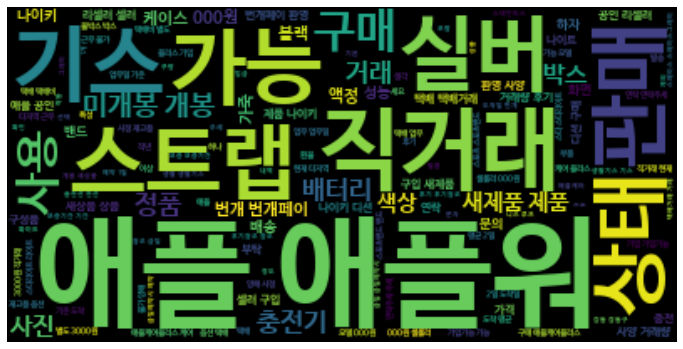

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Article 의 단어들을 추출 한것중, 각 단어의 빈도수를 분석
aw_noun_count= collections.Counter(list_result)
aw_noun_count

Counter({'직거래': 34,
         '41': 8,
         '36': 2,
         '36만원': 2,
         '1개': 4,
         '45': 12,
         '40': 20,
         '40만원': 2,
         '미드': 2,
         '스타': 8,
         '가능': 31,
         '정품': 16,
         '정품100프로': 2,
         '100': 9,
         '프로': 4,
         '보장': 2,
         '주말': 3,
         '주말제외': 2,
         '제외': 4,
         '배송': 8,
         '배송발송': 2,
         '발송': 5,
         '일주일': 2,
         '예약': 8,
         '예약제품': 2,
         '제품': 19,
         '거래': 20,
         '거래내역': 2,
         '내역': 4,
         '스트랩': 19,
         '스트랩3개': 2,
         '지금': 3,
         '케이스쒸어났습니': 1,
         '화면': 7,
         '부품': 5,
         '패션': 1,
         '세요': 5,
         '상품': 10,
         '기능': 3,
         '검수': 1,
         '완료': 2,
         '상품구성': 1,
         '구성': 2,
         '애플': 56,
         '애플워': 45,
         '정보': 1,
         '상품번호': 1,
         '번호': 3,
         '배터리': 15,
         '효율': 2,
         '85': 1,
         '수리': 3,
         '서비스': 

In [ ]:
#Apple Watch 의 article column 에 있는 단어들중, 가장 빈도수가 높은 단어 50개
aw_noun_top50= collections.Counter(list_result).most_common(50)
aw_noun_top50

[('애플', 56),
 ('애플워', 45),
 ('직거래', 34),
 ('가능', 31),
 ('택배', 29),
 ('구매', 29),
 ('기스', 23),
 ('44', 22),
 ('40', 20),
 ('거래', 20),
 ('나이키', 20),
 ('제품', 19),
 ('스트랩', 19),
 ('개봉', 19),
 ('실버', 19),
 ('판매', 18),
 ('박스', 18),
 ('상태', 17),
 ('미개봉', 17),
 ('사용', 17),
 ('정품', 16),
 ('충전기', 16),
 ('배터리', 15),
 ('번개', 15),
 ('셀룰러', 15),
 ('후기', 15),
 ('사진', 13),
 ('45', 12),
 ('불가', 12),
 ('밴드', 12),
 ('새제품', 12),
 ('3000', 12),
 ('번개페이', 11),
 ('구입', 11),
 ('연락', 11),
 ('색상', 11),
 ('모델', 11),
 ('상품', 10),
 ('케이스', 10),
 ('케어', 10),
 ('100', 9),
 ('주세', 9),
 ('가죽', 9),
 ('액정', 9),
 ('블랙', 9),
 ('41', 8),
 ('스타', 8),
 ('배송', 8),
 ('예약', 8),
 ('별도', 8)]